In [100]:
import pandas as pd
import numpy as np
df=pd.read_csv("/content/diabetes_clean.csv")

In [101]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [102]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [103]:
X.shape

(768, 8)

In [104]:
y.shape

(768,)

In [105]:
y = y.squeeze()

In [106]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [107]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [108]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [109]:
X_scaled

array([[ 0.63994726,  0.86604475, -0.03198993, ...,  0.16661938,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20506583, -0.5283186 , ..., -0.85219976,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01666174, -0.69376149, ..., -1.33250021,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02157407, -0.03198993, ..., -0.910418  ,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14279979, -1.02464727, ..., -0.34279019,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94206766, -0.19743282, ..., -0.29912651,
        -0.47378505, -0.87137393]])

In [110]:
y_scaled=scaler.fit_transform(y.values.reshape(-1,1))

In [111]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [112]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=8,
    min_samples_split=5,
    min_samples_leaf=3,
    class_weight='balanced',
    random_state=42
)

model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8, min_samples_leaf=3,
                       min_samples_split=5, n_estimators=300, random_state=42)

In [113]:
y_pred= model.predict(X_test)

In [114]:
y_pred

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0])

In [115]:
y_test

,Outcome
44,0
672,0
700,0
630,1
81,0
...,...
32,0
637,0
593,0
425,1


In [116]:
# STEP 9: Evaluation
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7532467532467533

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.80       100
           1       0.63      0.70      0.67        54

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154



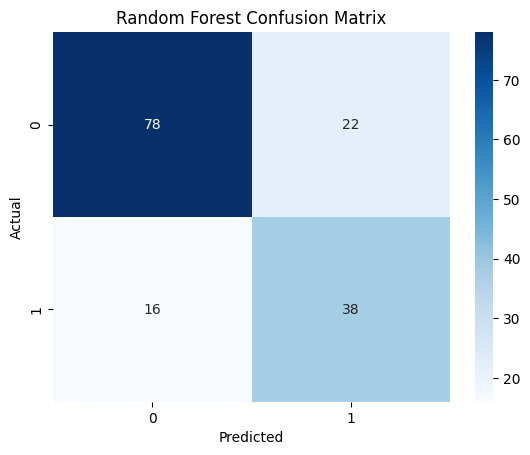

In [117]:
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

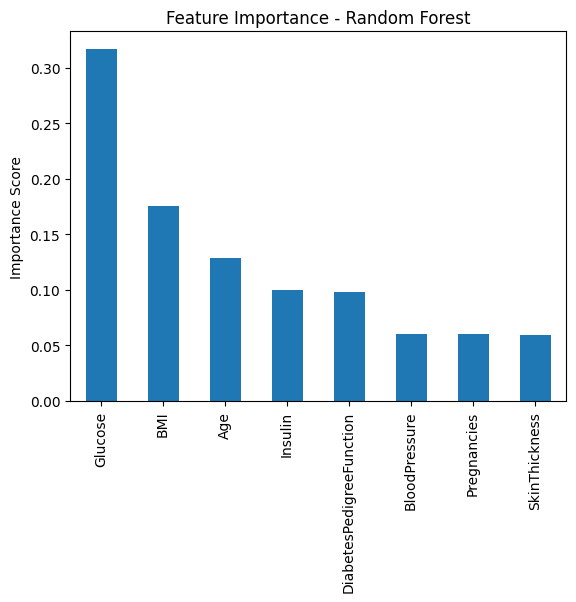

In [118]:
#Feature Importance Visualization
feature_importance = pd.Series(
    model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.plot(kind='bar')
plt.title("Feature Importance - Random Forest")
plt.ylabel("Importance Score")
plt.show()


In [123]:
new_patient = [[2,130,70,25,100,30.5,0.45,35]]

prediction = model.predict(new_patient)

if prediction[0] == 1:
    print("⚠️ Patient is likely DIABETIC")
else:
    print("✅ Patient is likely NON-DIABETIC")


⚠️ Patient is likely DIABETIC


In [124]:
import joblib
joblib.dump(model, "diabetes_rf_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [125]:
import os
os.listdir()


['.config',
 'scaler.pkl',
 'diabetes_clean.csv',
 'diabetes_rf_model.pkl',
 'sample_data']

In [126]:
from google.colab import files
files.download("diabetes_rf_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>